In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn_rvm import EMRVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from xgboost import XGBClassifier

## Base Model
* Logistic Regresssion

## Kernelized
* Support Vector Machine Classification

## Bayesian
* Relevance Vector Machine Classification

## Tree-based
* XGBoost

In [2]:
df = pd.read_csv('data/gym_data_preprocessed.csv')
df.set_index('Member_ID', inplace=True)

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # same seed from `gym_churn_clustering.ipynb`

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (3200, 16)
y_train.shape: (3200,)
X_test.shape: (800, 16)
y_test.shape: (800,)


In [3]:
def evaluate_model(model, X, y_true):
    y_hat = model.predict(X)
    accuracy = accuracy_score(y_true, y_hat)
    precision = precision_score(y_true, y_hat)
    recall = recall_score(y_true, y_hat)

    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')

    model_dict = {'accuracy': accuracy,
                  'precision': precision,
                  'recall': recall}

    return model_dict


def plot_conf_mat(models, X, y, figsize, nrows=None, ncols=None):
    n_models = len(models)

    if nrows==ncols==None:
        ncols = 2
        nrows = nrows = (n_models//ncols) + (n_models%ncols!=0)
    elif nrows!=None and ncols!=None:
        if nrows*ncols < n_models:
            raise ValueError("nrows*ncols less than n_models")
    elif nrows==None and ncols!=None:
        nrows = (n_models//ncols) + (n_models%ncols!=0)
    elif nrows!=None and ncols==None:
        ncols = (n_models//nrows) + (n_models%nrows!=0)

    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    ax = ax.flatten()

    for i, model_name in enumerate(models.keys()):
        model = models[model_name]
    
        conf_mat = ConfusionMatrixDisplay.from_estimator(model, X, y, normalize=None, ax=ax[i])
        conf_mat.ax_.set_title(f'{model_name} Confusion Matrix')

        #roc = RocCurveDisplay.from_estimator(model, X, y_true, ax=axs[0,1])
        #roc.ax_.set_title(f'{model_name} ROC Curve')

    return fig, ax

def plot_roc_curve(models, X, y, ax=None):
    fig_exists = False
    if ax is None:
        fig, ax = plt.subplots(1,1)
        fig_exists = True
    

    ax.set_title('ROC Curves')
    
    for model_name in models.keys():
        model = models[model_name]

        roc = RocCurveDisplay.from_estimator(model, X, y, ax=ax)
    
    if fig_exists:
        return fig, ax 
    else:
        return ax

In [4]:
metrics = {}

In [5]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)
metrics['Logistic Regression'] = evaluate_model(log_reg, X_test, y_test)

Accuracy: 0.91625
Precision: 0.8258706467661692
Recall: 0.8383838383838383


In [6]:
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)
metrics['Support Vector Machine'] = evaluate_model(svm, X_test, y_test)

Accuracy: 0.92625
Precision: 0.8492462311557789
Recall: 0.8535353535353535


In [7]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
metrics['Gaussian Naive Bayes'] = evaluate_model(gnb, X_test, y_test)

Accuracy: 0.81125
Precision: 0.5750798722044729
Recall: 0.9090909090909091


In [8]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
metrics['XGBoost'] = evaluate_model(xgb, X_test, y_test)

Accuracy: 0.94
Precision: 0.8826530612244898
Recall: 0.8737373737373737


In [9]:
pd.DataFrame(metrics).T

,accuracy,precision,recall
Logistic Regression,0.91625,0.825871,0.838384
Support Vector Machine,0.92625,0.849246,0.853535
Gaussian Naive Bayes,0.81125,0.575080,0.909091
XGBoost,0.94000,0.882653,0.873737


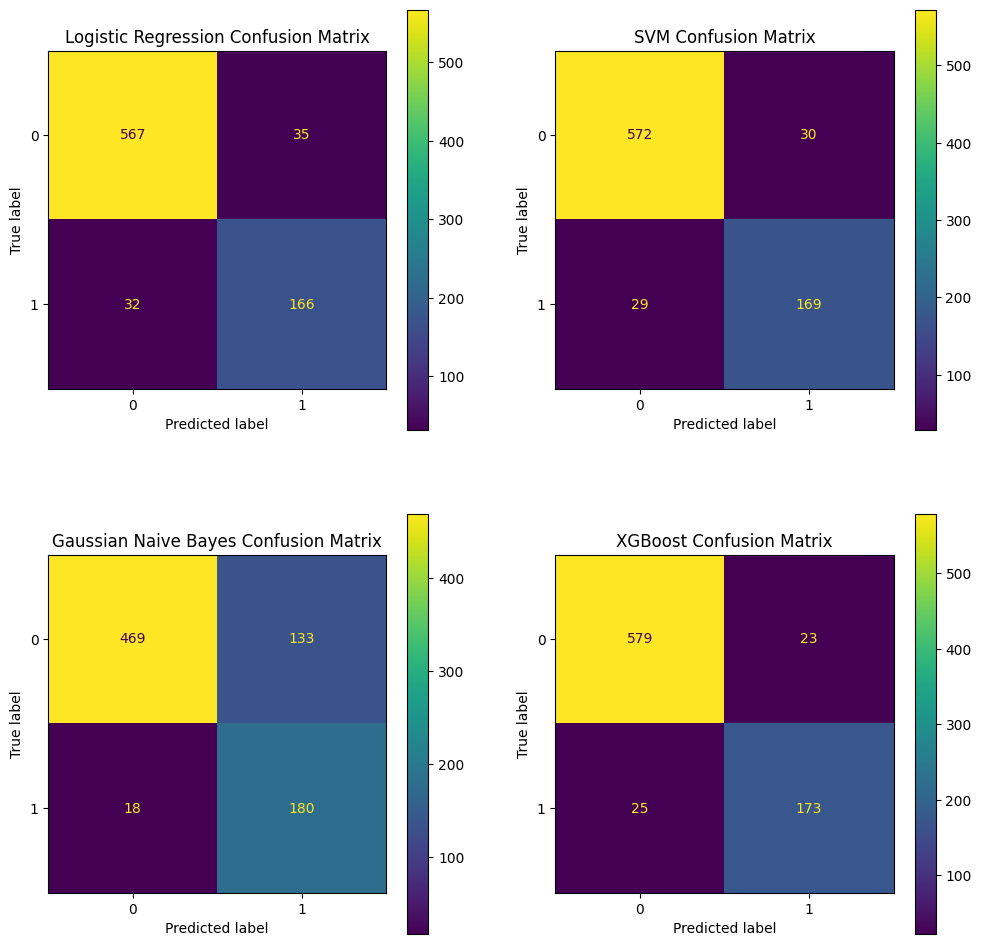

In [10]:
models = {'Logistic Regression': log_reg,
          'SVM': svm,
          'Gaussian Naive Bayes': gnb,
          'XGBoost': xgb}


fig, axs = plot_conf_mat(models, X_test, y_test, figsize=(12,12))
plt.show()

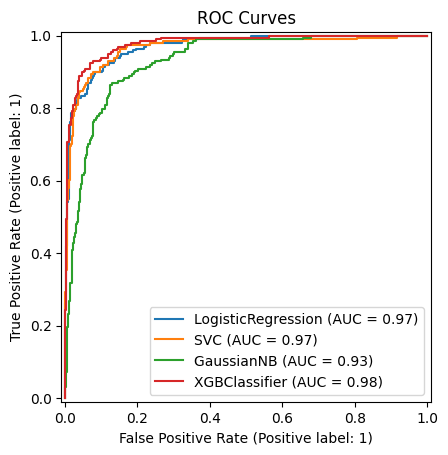

In [11]:
roc_curve = plot_roc_curve(models, X_test, y_test)
plt.show()